In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Hackerearth ML Challenge : Adopt a Buddy 

Problem Description: [Hackerearth Link](https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-pet-adoption/machine-learning/pet-adoption-9-5838c75b/) \

We have been given training and testing dataset which has columns like the Pet_Id , Condition , Color , Issue and Listing Date. The target variables are the breed_category and pet_category which we need to predict \

As there are two classes , the approach taken is training two models for each classes and then testing seperately and appending the final result. \

## Importing Dataset

In [ ]:
import pandas as pd
df_train=pd.read_csv('drive/My Drive/train_pet.csv')
df_test=pd.read_csv('drive/My Drive/test_pet.csv')

In [ ]:
print(df_train.head())
print(df_train.tail())

       pet_id           issue_date  ... breed_category  pet_category
0  ANSL_69903  2016-07-10 00:00:00  ...            0.0             1
1  ANSL_66892  2013-11-21 00:00:00  ...            0.0             2
2  ANSL_69750  2014-09-28 00:00:00  ...            2.0             4
3  ANSL_71623  2016-12-31 00:00:00  ...            0.0             2
4  ANSL_57969  2017-09-28 00:00:00  ...            0.0             1

[5 rows x 11 columns]
           pet_id           issue_date  ... breed_category  pet_category
18829  ANSL_51738  2017-01-26 00:00:00  ...            0.0             2
18830  ANSL_59900  2016-06-18 00:00:00  ...            2.0             4
18831  ANSL_53210  2010-07-21 00:00:00  ...            1.0             1
18832  ANSL_63468  2017-05-12 00:00:00  ...            1.0             2
18833  ANSL_73558  2011-12-13 00:00:00  ...            1.0             2

[5 rows x 11 columns]


# Viewing the columns

In [ ]:
print(df_train.columns)

Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category',
       'pet_category'],
      dtype='object')


# Displaying the Unique values

In [ ]:
print(df_train['pet_category'].unique())

[1 2 4 0]


In [ ]:
y_train=df_train['pet_category'].values
print(y_train)

[1 2 4 ... 1 2 2]


In [ ]:
print(df_train['condition'].unique())
print(df_train['color_type'].unique())
print(df_train['breed_category'].unique())

[ 2.  1. nan  0.]
['Brown Tabby' 'White' 'Brown' 'Black' 'Red' 'Tricolor' 'Calico'
 'Brown Brindle' 'Blue' 'Tortie' 'Gray' 'Fawn' 'Buff' 'Torbie'
 'Orange Tabby' 'Sable' 'Tan' 'Blue Tick' 'Orange' 'Blue Tabby'
 'Chocolate' 'Black Tabby' 'Black Brindle' 'Cream Tabby' 'Gold'
 'Calico Point' 'Blue Merle' 'Red Merle' 'Yellow' 'Lynx Point'
 'Blue Cream' 'Flame Point' 'Cream' 'Yellow Brindle' 'Blue Tiger'
 'Seal Point' 'Red Tick' 'Brown Merle' 'Black Smoke' 'Gray Tabby' 'Green'
 'Tortie Point' 'Blue Smoke' 'Apricot' 'Blue Point' 'Silver Tabby'
 'Lilac Point' 'Silver' 'Brown Tiger' 'Liver' 'Agouti' 'Chocolate Point'
 'Liver Tick' 'Pink' 'Black Tiger' 'Silver Lynx Point']
[0. 2. 1.]


In [ ]:
print(df_train['length(m)'].unique())
print(df_train['height(cm)'].unique())
print(df_train['X1'].unique())
print(df_train['X2'].unique())

[0.8  0.72 0.15 0.62 0.5  0.92 0.14 0.05 0.55 0.3  0.44 0.2  0.45 0.48
 0.18 0.88 0.93 0.76 0.96 0.66 0.31 0.51 0.53 0.32 0.98 0.68 0.16 0.6
 0.83 0.03 0.91 0.73 0.9  0.65 0.79 0.08 0.52 0.42 0.07 0.41 0.54 0.19
 0.67 0.7  0.33 0.09 0.04 0.38 0.1  0.49 0.24 0.17 0.27 0.58 0.01 0.56
 0.46 0.64 0.   0.89 0.43 0.02 0.21 0.11 0.84 0.06 0.61 0.81 0.82 0.99
 0.95 0.37 0.69 0.63 0.36 0.97 0.4  0.77 1.   0.47 0.87 0.29 0.12 0.26
 0.85 0.28 0.78 0.86 0.71 0.74 0.75 0.22 0.35 0.57 0.39 0.94 0.25 0.13
 0.23 0.59 0.34]
[ 7.78 14.19 40.9  ... 17.28 12.35 42.87]
[13 15  0 18  7 16 11  9 12 17  2  8  3  1  4 10  6  5 19 14]
[9 4 1 7 6 2 8 3 5 0]


# Calculating the no. of NAN values

Training dataset stats

In [ ]:
print(df_train['length(m)'].isna().sum())
print(df_train['height(cm)'].isna().sum())
print(df_train['X1'].isna().sum())
print(df_train['X2'].isna().sum())

print(df_train['condition'].isna().sum())
print(df_train['color_type'].isna().sum())
print(df_train['breed_category'].isna().sum())

0
0
0
0
1477
0
0


Testing dataset stats

In [ ]:
print(df_test['length(m)'].isna().sum())
print(df_test['height(cm)'].isna().sum())
print(df_test['X1'].isna().sum())
print(df_test['X2'].isna().sum())

print(df_test['condition'].isna().sum())
print(df_test['color_type'].isna().sum())
#print(df_test['breed_category'].isna().sum())

0
0
0
0
619
0


**Observation:** The column 'condition' is having many Nan values

In [ ]:
print(df_train.groupby(['condition']).size())

print(df_train[df_train['condition'].isnull()])

condition
0.0    6281
1.0    6819
2.0    4257
dtype: int64
           pet_id           issue_date  ... breed_category  pet_category
2      ANSL_69750  2014-09-28 00:00:00  ...            2.0             4
21     ANSL_50488  2018-01-07 00:00:00  ...            2.0             4
35     ANSL_54000  2018-01-14 00:00:00  ...            2.0             1
38     ANSL_50330  2017-07-27 00:00:00  ...            2.0             4
43     ANSL_58673  2017-12-29 00:00:00  ...            2.0             1
...           ...                  ...  ...            ...           ...
18761  ANSL_62681  2017-09-17 00:00:00  ...            2.0             1
18777  ANSL_69550  2016-07-15 00:00:00  ...            2.0             1
18801  ANSL_65823  2009-03-22 00:00:00  ...            2.0             1
18812  ANSL_63707  2014-10-29 00:00:00  ...            2.0             4
18830  ANSL_59900  2016-06-18 00:00:00  ...            2.0             4

[1477 rows x 11 columns]


In [ ]:
print(df_train[df_train['condition'].isnull()]['breed_category'].unique())

[2.]


**Observation:** Only For breed_category 2.0 , condition value is null

In [ ]:
df_train[df_train['breed_category']==2].count()

pet_id            1477
issue_date        1477
listing_date      1477
condition            0
color_type        1477
length(m)         1477
height(cm)        1477
X1                1477
X2                1477
breed_category    1477
pet_category      1477
dtype: int64

So, we can give a unique value for condition where it is null

# Clearing NAN value in 'condition' column

In [ ]:
import numpy as np
df_train['condition']=df_train['condition'].replace(np.nan,3)

In [ ]:
df_test['condition']=df_test['condition'].replace(np.nan,3)

In [ ]:
print(df_train.groupby(['condition']).size())

print(df_train[df_train['condition'].isnull()])

condition
0.0    6281
1.0    6819
2.0    4257
3.0    1477
dtype: int64
Empty DataFrame
Columns: [pet_id, issue_date, listing_date, condition, color_type, length(m), height(cm), X1, X2, breed_category, pet_category]
Index: []


# Finding difference between issue_date and listing_date in days

Calculating Difference and adding feature for training data

In [ ]:
df_train['diff_days']=np.abs((pd.to_datetime(df_train['listing_date'].values)-pd.to_datetime(df_train['issue_date'].values)).days)

print(df_train['diff_days'].values)

[  73 1862  752 ... 2954  272 2509]


Calculating Difference and adding feature for testing data

In [ ]:
df_test['diff_days']=(pd.to_datetime(df_test['listing_date'].values)-pd.to_datetime(df_test['issue_date'].values)).days

print(df_test['diff_days'].values)

[4404  174 1999 ...  393  387  392]


Checking the correctness of difference (in days)

In [ ]:
print(df_train['issue_date'][5], " ", df_train['listing_date'][5], " ",df_train['diff_days'][5])

2017-10-25 00:00:00   2019-03-10 13:18:00   501


So, we have added new feature 'diff_days' which describes difference in days between listing date and issue date. \


# Removing date-time columns

Dropping columns from training dataset

In [ ]:
df_train_new=df_train.drop(columns=['issue_date','listing_date'])

print(df_train_new.head())
print(df_train_new.columns)

       pet_id  condition   color_type  ...  breed_category  pet_category  diff_days
0  ANSL_69903        2.0  Brown Tabby  ...             0.0             1         73
1  ANSL_66892        1.0        White  ...             0.0             2       1862
2  ANSL_69750        3.0        Brown  ...             2.0             4        752
3  ANSL_71623        1.0        White  ...             0.0             2        755
4  ANSL_57969        2.0        Black  ...             0.0             1         52

[5 rows x 10 columns]
Index(['pet_id', 'condition', 'color_type', 'length(m)', 'height(cm)', 'X1',
       'X2', 'breed_category', 'pet_category', 'diff_days'],
      dtype='object')


Dropping columns from testing dataset

In [ ]:
df_test_new=df_test.drop(columns=['issue_date','listing_date'])

print(df_test_new.head())
print(df_test_new.columns)

       pet_id  condition    color_type  ...  X1  X2  diff_days
0  ANSL_75005        0.0         Black  ...   0   7       4404
1  ANSL_76663        1.0  Orange Tabby  ...   0   1        174
2  ANSL_58259        1.0         Black  ...   0   7       1999
3  ANSL_67171        1.0         Black  ...   7   1       1148
4  ANSL_72871        1.0         Brown  ...   0   7        463

[5 rows x 8 columns]
Index(['pet_id', 'condition', 'color_type', 'length(m)', 'height(cm)', 'X1',
       'X2', 'diff_days'],
      dtype='object')


# Encoding columns of categorical names with numbers

Encoding the color_type column in training dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_train_new["color_type_code"] = lb_make.fit_transform(df_train_new["color_type"])
df_train_new[["color_type", "color_type_code"]].head(11)

,color_type,color_type_code
0,Brown Tabby,18
1,White,53
2,Brown,15
3,White,53
4,Black,2
5,Red,40
6,Brown Tabby,18
7,White,53
8,Brown,15
9,Brown,15


Encoding the color_type column in testing dataset

In [ ]:
df_test_new["color_type_code"] = lb_make.transform(df_test_new["color_type"])
df_test_new[["color_type", "color_type_code"]].head(11)

,color_type,color_type_code
0,Black,2
1,Orange Tabby,38
2,Black,2
3,Black,2
4,Brown,15
5,Brown Tabby,18
6,White,53
7,Fawn,27
8,Black,2
9,White,53


Dropping the column from both the training and testing dataset

In [ ]:
df_train_new['color_type_code'].unique()

df_train_new=df_train_new.drop(columns=['color_type'])

print(df_train_new.head(25))

        pet_id  condition  length(m)  ...  pet_category  diff_days  color_type_code
0   ANSL_69903        2.0       0.80  ...             1         73               18
1   ANSL_66892        1.0       0.72  ...             2       1862               53
2   ANSL_69750        3.0       0.15  ...             4        752               15
3   ANSL_71623        1.0       0.62  ...             2        755               53
4   ANSL_57969        2.0       0.50  ...             1         52                2
5   ANSL_52200        0.0       0.92  ...             2        501               40
6   ANSL_75444        2.0       0.14  ...             1        154               18
7   ANSL_52759        0.0       0.15  ...             1         89               53
8   ANSL_74632        2.0       0.05  ...             2        299               15
9   ANSL_56464        2.0       0.55  ...             2       1123               15
10  ANSL_69485        0.0       0.30  ...             2       4411          

In [ ]:
df_test_new['color_type_code'].unique()

df_test_new=df_test_new.drop(columns=['color_type'])

print(df_test_new.head(25))

        pet_id  condition  length(m)  ...  X2  diff_days  color_type_code
0   ANSL_75005        0.0       0.87  ...   7       4404                2
1   ANSL_76663        1.0       0.06  ...   1        174               38
2   ANSL_58259        1.0       0.24  ...   7       1999                2
3   ANSL_67171        1.0       0.29  ...   1       1148                2
4   ANSL_72871        1.0       0.71  ...   7        463               15
5   ANSL_64886        0.0       0.90  ...   9        389               18
6   ANSL_73798        0.0       0.87  ...   9        812               53
7   ANSL_53131        0.0       0.06  ...   1        562               27
8   ANSL_66674        2.0       0.82  ...   9         69                2
9   ANSL_55165        2.0       0.76  ...   9        753               53
10  ANSL_74518        2.0       0.95  ...   9        388                2
11  ANSL_72217        1.0       0.29  ...   1       1867                2
12  ANSL_55812        1.0       0.23  

# Distribution of values in some features

In [ ]:
print(df_train_new.columns)

Index(['pet_id', 'condition', 'length(m)', 'height(cm)', 'X1', 'X2',
       'breed_category', 'pet_category', 'diff_days', 'color_type_code'],
      dtype='object')


Checking skewness of Length(m)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


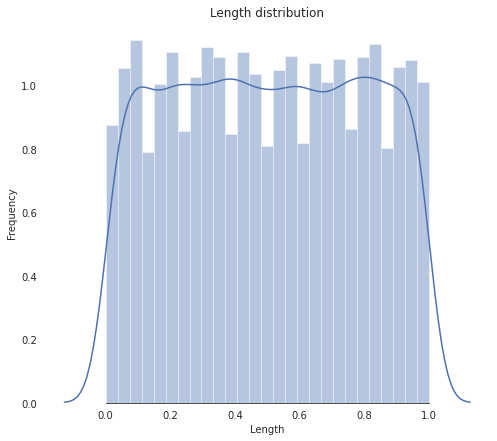

skew value:  -0.0024468843922843607


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew 
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the distribution 
sns.distplot(df_train_new['length(m)'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Length")
ax.set(title="Length distribution")
sns.despine(trim=True, left=True)
plt.show()

print("skew value: ", skew(df_train_new['length(m)']))

Checking skewness of Height(cm)

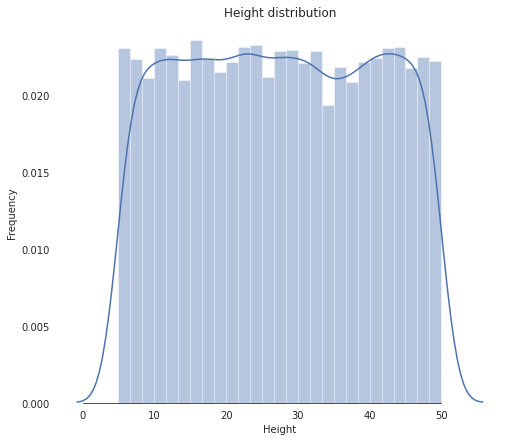

skew value:  0.008524748460917272


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew 
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the distribution 
sns.distplot(df_train_new['height(cm)'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Height")
ax.set(title="Height distribution")
sns.despine(trim=True, left=True)
plt.show()

print("skew value: ", skew(df_train_new['height(cm)']))

Checking skewness of X1

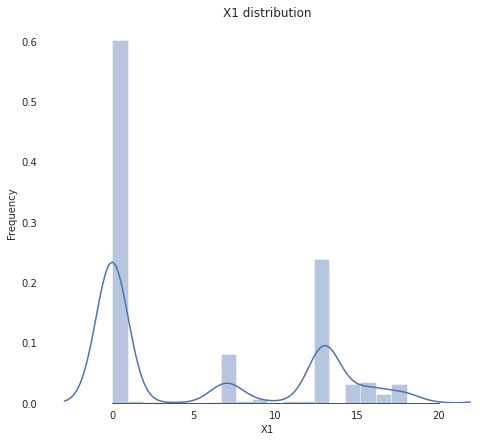

skew value:  0.5637012019162411


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew 
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the distribution 
sns.distplot(df_train_new['X1'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="X1")
ax.set(title="X1 distribution")
sns.despine(trim=True, left=True)
plt.show()

print("skew value: ", skew(df_train_new['X1']))

Checking skewness of X2

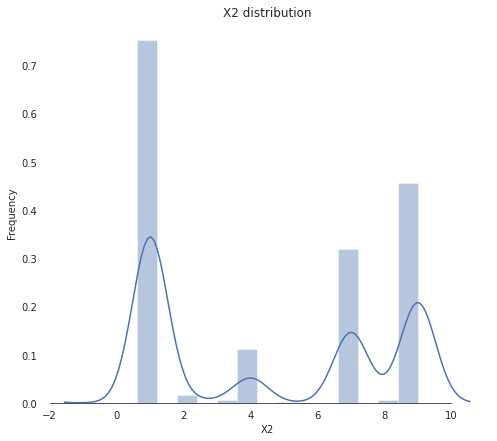

skew value:  0.1290969596483043


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew 
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the distribution 
sns.distplot(df_train_new['X2'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="X2")
ax.set(title="X2 distribution")
sns.despine(trim=True, left=True)
plt.show()

print("skew value: ", skew(df_train_new['X2']))

We noticed that only in column X1, there is high skewness, so we take the log transform of that column both in training and testing dataset

For Training Dataset

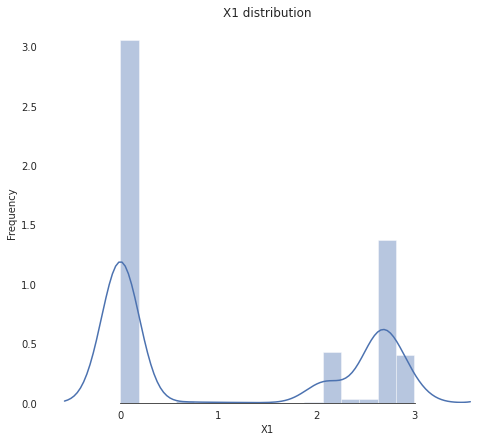

skew value:  0.3500333532324617


In [ ]:
# to check skewness of X1 Score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew 
X1_trans=np.log(1+df_train_new['X1'].values)
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the distribution 
sns.distplot(X1_trans, color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="X1")
ax.set(title="X1 distribution")
sns.despine(trim=True, left=True)
plt.show()

print("skew value: ", skew(X1_trans))

For Testing Dataset

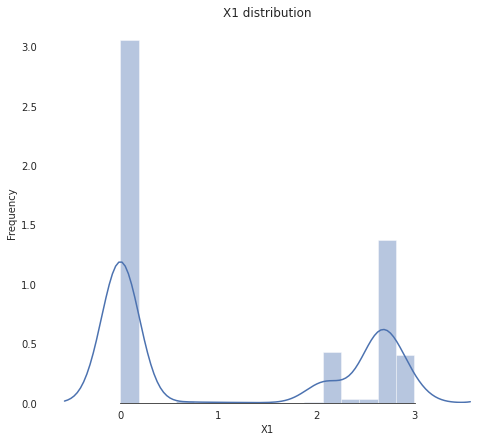

skew value:  0.37313424850718874


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew 
X1_trans_test=np.log(1+df_test_new['X1'].values)
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the distribution 
sns.distplot(X1_trans, color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="X1")
ax.set(title="X1 distribution")
sns.despine(trim=True, left=True)
plt.show()

print("skew value: ", skew(X1_trans_test))

In [ ]:
df_train_norm=df_train_new
df_train_norm['X1']=X1_trans

df_test_norm=df_test_new
df_test_norm['X1']=X1_trans_test

# Creating features on basis of magnitude of Length and Height

* Length: high (0 to 0.3) , medium (0.3 to 0.6) , high( 0.6 to 1.0)
* Height: high (0 to 15) , medium (15 to 30) , high(30 to 45)

In [ ]:
df_train_norm['Low_Height']=np.where(df_train_norm['height(cm)']<=15,1,0)
df_train_norm['Medium_Height']=np.where(((df_train_norm['height(cm)']>15) & (df_train_norm['height(cm)']<=30)),1,0)
df_train_norm['High_Height']=np.where(df_train_norm['height(cm)']>30,1,0)

df_test_norm['Low_Height']=np.where(df_test_norm['height(cm)']<=15,1,0)
df_test_norm['Medium_Height']=np.where(((df_test_norm['height(cm)']>15) & (df_test_norm['height(cm)']<=30)),1,0)
df_test_norm['High_Height']=np.where(df_test_norm['height(cm)']>30,1,0)

In [ ]:
df_train_norm['Low_Length']=np.where(df_train_norm['length(m)']<=0.3,1,0)
df_train_norm['Medium_Length']=np.where((df_train_norm['length(m)']>0.3) & (df_train_norm['length(m)']<=0.6),1,0)
df_train_norm['High_Length']=np.where(df_train_norm['length(m)']>0.6,1,0)

df_test_norm['Low_Length']=np.where(df_test_norm['length(m)']<=0.3,1,0)
df_test_norm['Medium_Length']=np.where((df_test_norm['length(m)']>0.3) & (df_test_norm['length(m)']<=0.6),1,0)
df_test_norm['High_Length']=np.where(df_test_norm['length(m)']>0.6,1,0)

In [ ]:
print(df_train_norm.head(20))

        pet_id  condition  length(m)  ...  Low_Length  Medium_Length  High_Length
0   ANSL_69903        2.0       0.80  ...           0              0            1
1   ANSL_66892        1.0       0.72  ...           0              0            1
2   ANSL_69750        3.0       0.15  ...           1              0            0
3   ANSL_71623        1.0       0.62  ...           0              0            1
4   ANSL_57969        2.0       0.50  ...           0              1            0
5   ANSL_52200        0.0       0.92  ...           0              0            1
6   ANSL_75444        2.0       0.14  ...           1              0            0
7   ANSL_52759        0.0       0.15  ...           1              0            0
8   ANSL_74632        2.0       0.05  ...           1              0            0
9   ANSL_56464        2.0       0.55  ...           0              1            0
10  ANSL_69485        0.0       0.30  ...           1              0            0
11  ANSL_51014  

# XGBoost training and validation

In [ ]:
from sklearn.model_selection import train_test_split

Y=df_train_norm['pet_category'].values
X=df_train_norm.drop(columns=['pet_category','pet_id','breed_category'])

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

model=XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f1_score(y_pred,y_test,average='weighted'))
print(accuracy_score(y_pred,y_test))



from sklearn.model_selection import train_test_split

Y=df_train_norm['breed_category'].values
X=df_train_norm.drop(columns=['pet_category','pet_id','breed_category'])

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

model2=XGBClassifier()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
print(f1_score(y_pred,y_test,average='weighted'))
print(accuracy_score(y_pred,y_test))

(15067, 13)
(3767, 13)
(15067,)
(3767,)
0.8899366641659971
0.8882399787629414
(15067, 13)
(3767, 13)
(15067,)
(3767,)
0.9088845987298031
0.9086806477302893


In [ ]:
from sklearn.model_selection import train_test_split

#Y_test_fin=df_test_new['pet_category'].values
idx=df_test_norm['pet_id'].values
X_test_fin=df_test_norm.drop(columns=['pet_id'])


y_pred_fin=model.predict(X_test_fin)


from sklearn.model_selection import train_test_split

#Y_test_fin=df_test_new['pet_category'].values
idx=df_test_norm['pet_id'].values
X_test_fin=df_test_norm.drop(columns=['pet_id'])


y_pred_fin2=model2.predict(X_test_fin)


df_sub = pd.DataFrame({'pet_id': idx,
                   'breed_category': y_pred_fin2,
                   'pet_category': y_pred_fin})
df_sub.to_csv('submit.csv',index=False)

XGBoost without any parameter tuning gave performance f1 score of 89.71 on submission \

# XGBoost Parameter tuning

In [ ]:
from sklearn.model_selection import train_test_split

Y=df_train_norm['pet_category'].values
X=df_train_norm.drop(columns=['pet_category','pet_id','breed_category'])

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

model=XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.4,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=4)

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f1_score(y_pred,y_test,average='weighted'))
print(accuracy_score(y_pred,y_test))



from sklearn.model_selection import train_test_split

Y=df_train_norm['breed_category'].values
X=df_train_norm.drop(columns=['pet_category','pet_id','breed_category'])

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

model2=XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.4,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=4)
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
print(f1_score(y_pred,y_test,average='weighted'))
print(accuracy_score(y_pred,y_test))

(12618, 13)
(6216, 13)
(12618,)
(6216,)
0.9004730896340712
0.8992921492921493
(12618, 13)
(6216, 13)
(12618,)
(6216,)
0.8997540085696951
0.8996138996138996


In [ ]:
from sklearn.model_selection import train_test_split

#Y_test_fin=df_test_new['pet_category'].values
idx=df_test_norm['pet_id'].values
X_test_fin=df_test_norm.drop(columns=['pet_id'])


y_pred_fin=model.predict(X_test_fin)


from sklearn.model_selection import train_test_split

#Y_test_fin=df_test_new['pet_category'].values
idx=df_test_norm['pet_id'].values
X_test_fin=df_test_norm.drop(columns=['pet_id'])


y_pred_fin2=model2.predict(X_test_fin)


df_sub = pd.DataFrame({'pet_id': idx,
                   'breed_category': y_pred_fin2,
                   'pet_category': y_pred_fin})
df_sub.to_csv('submit.csv',index=False)

Observations of performance with respect to learning rate:

* learning rate=0.01 (89.75)
* learning rate=0.1 (90.04)
* learning rate=0.4 (90.17)
* learning rate=0.6 (90.14)

Now the 'max_depth' parameter is decreased from 4 and tried with 3, 2 and 1. 

It is found that 4 is optimal

The subsample is increased from 0.8 but we found that it is optimal


Performance with respect to 'gamma' parameter original 
* gamme= 5 (90.57)
* gamma= 4 (90.7)

gamma=4 is optimal

# Training the final XGBoost tuned model

In [ ]:
from sklearn.model_selection import train_test_split

Y=df_train_norm['pet_category'].values
X=df_train_norm.drop(columns=['pet_category','pet_id','breed_category'])
'''
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
'''
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

modelx=XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.4,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=4)

modelx.fit(X,Y)

'''
y_pred=model.predict(X_test)
print(f1_score(y_pred,y_test,average='weighted'))
print(accuracy_score(y_pred,y_test))

'''

from sklearn.model_selection import train_test_split

Y=df_train_norm['breed_category'].values
X=df_train_norm.drop(columns=['pet_category','pet_id','breed_category'])
'''
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

modelx2=XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.4,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=4)
modelx2.fit(X,Y)
'''
y_pred=model2.predict(X_test)
print(f1_score(y_pred,y_test,average='weighted'))
print(accuracy_score(y_pred,y_test))

'''

"\ny_pred=model2.predict(X_test)\nprint(f1_score(y_pred,y_test,average='weighted'))\nprint(accuracy_score(y_pred,y_test))\n\n"

# Testing the data and submission

In [ ]:
from sklearn.model_selection import train_test_split

#Y_test_fin=df_test_new['pet_category'].values
idx=df_test_norm['pet_id'].values
X_test_fin=df_test_norm.drop(columns=['pet_id'])


y_pred_fin=modelx.predict(X_test_fin)


from sklearn.model_selection import train_test_split

#Y_test_fin=df_test_new['pet_category'].values
idx=df_test_norm['pet_id'].values
X_test_fin=df_test_norm.drop(columns=['pet_id'])


y_pred_fin2=modelx2.predict(X_test_fin)


df_sub = pd.DataFrame({'pet_id': idx,
                   'breed_category': y_pred_fin2,
                   'pet_category': y_pred_fin})
df_sub.to_csv('submit.csv',index=False)

# Final Inference

90.81 without train_test_split

After this it is checked the diff_days column had negative values for two cases in the training dataset. So used np.abs() for calculation of difference. \
After retraining the model and testing it, final f1 score acheived on submission is 90.83

Apart from XgBoost classifier, I had tried with RandomForest, LGBM and CatBoost Classifier too, but it was found that XgBoost performed the best